<a href="https://colab.research.google.com/github/RohithMacharla11/Personalized-Health-Fitness-Tracker/blob/main/Personalized_Health_Fitness_Tracker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

In [ ]:
data = pd.read_csv('personalized_health_fitness_dataset1.csv')
data.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,34.0,Female,86.7,1.86,174.0,152.0,74.0,1.12,712.0,Strength,12.8,2.4,5.0,2.0,14.31
1,26.0,Female,84.7,1.83,166.0,156.0,73.0,1.00,833.0,Strength,27.9,2.8,5.0,2.0,33.49
2,22.0,Male,64.8,1.85,187.0,166.0,64.0,1.24,1678.0,Cardio,28.7,1.9,3.0,2.0,12.73
3,54.0,Female,75.3,1.82,187.0,169.0,58.0,1.45,628.0,Cardio,31.8,2.4,4.0,1.0,20.37
4,34.0,Female,52.8,1.74,177.0,169.0,66.0,1.60,1286.0,Strength,26.4,3.2,4.0,2.0,20.83


In [ ]:
data.shape

(1800, 15)

In [ ]:
data.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,1790.000000,1778.000000,1774.000000,1779.000000,1770.000000,1781.000000,1777.000000,1777.000000,1784.000000,1776.000000,1742.000000,1743.000000,1770.000000
mean,34.475419,67.606637,1.739233,180.232153,146.259322,63.951151,1.391598,1033.698931,23.509361,2.706644,3.339265,1.823867,19.957774
std,12.315728,19.861408,0.123892,11.452674,15.219516,7.936502,0.372342,328.049662,5.865557,0.710224,0.947955,0.746568,6.573175
min,18.000000,40.000000,1.500000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,23.000000,52.300000,1.650000,170.000000,133.250000,57.000000,1.130000,794.000000,20.500000,2.100000,3.000000,1.000000,14.780000
50%,33.000000,65.300000,1.730000,181.000000,146.000000,65.000000,1.370000,1030.000000,24.300000,2.800000,3.000000,2.000000,18.690000
75%,45.000000,80.100000,1.820000,190.000000,160.000000,72.000000,1.640000,1249.000000,27.500000,3.400000,4.000000,2.000000,23.517500
max,59.000000,129.900000,2.000000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000


In [ ]:
import pandas as pd
import scipy.stats as stats

numeric_data = data.select_dtypes(include=['int64', 'float64'])

kurtosis_values = numeric_data.kurtosis()
skewness_values = numeric_data.skew()

stats_df = pd.DataFrame({'Kurtosis': kurtosis_values, 'Skewness': skewness_values})

print(stats_df)


                               Kurtosis  Skewness
Age                           -1.152204  0.272309
Weight (kg)                    0.106921  0.646724
Height (m)                    -0.530010  0.171013
Max_BPM                       -1.215172 -0.077833
Avg_BPM                       -1.233729 -0.021473
Resting_BPM                   -1.367191 -0.202081
Session_Duration (hours)      -0.659333  0.073065
Calories_Burned               -0.341028  0.185211
Fat_Percentage                -0.220532 -0.538709
Water_Intake (liters)         -1.247154 -0.332523
Workout_Frequency (days/week) -0.930061  0.112491
Experience_Level              -1.161173  0.297724
BMI                            1.287188  1.101836


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            1790 non-null   float64
 1   Gender                         1729 non-null   object 
 2   Weight (kg)                    1778 non-null   float64
 3   Height (m)                     1774 non-null   float64
 4   Max_BPM                        1779 non-null   float64
 5   Avg_BPM                        1770 non-null   float64
 6   Resting_BPM                    1781 non-null   float64
 7   Session_Duration (hours)       1777 non-null   float64
 8   Calories_Burned                1777 non-null   float64
 9   Workout_Type                   1739 non-null   object 
 10  Fat_Percentage                 1784 non-null   float64
 11  Water_Intake (liters)          1776 non-null   float64
 12  Workout_Frequency (days/week)  1742 non-null   f

In [ ]:
print(data.columns)

Index(['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned',
       'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI'],
      dtype='object')


In [ ]:
print((data['Workout_Type'] == 'Strength').sum())
print((data['Workout_Type'] == 'Cardio').sum())
print((data['Workout_Type'] == 'Yoga').sum())
print((data['Workout_Type'] == 'HIIT').sum())


476
439
435
389


In [ ]:
print(data.isnull().sum())

Age                              10
Gender                           71
Weight (kg)                      22
Height (m)                       26
Max_BPM                          21
Avg_BPM                          30
Resting_BPM                      19
Session_Duration (hours)         23
Calories_Burned                  23
Workout_Type                     61
Fat_Percentage                   16
Water_Intake (liters)            24
Workout_Frequency (days/week)    58
Experience_Level                 57
BMI                              30
dtype: int64


In [ ]:
# Fill only numeric columns with their mean
data.fillna(data.select_dtypes(include=['number']).mean(), inplace=True)


In [ ]:
# Fill categorical columns with mode
for col in data.select_dtypes(include=['object']).columns:
    data[col].fillna(data[col].mode()[0], inplace=True)


In [ ]:
print(data.isnull().sum())

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            1800 non-null   float64
 1   Gender                         1800 non-null   object 
 2   Weight (kg)                    1800 non-null   float64
 3   Height (m)                     1800 non-null   float64
 4   Max_BPM                        1800 non-null   float64
 5   Avg_BPM                        1800 non-null   float64
 6   Resting_BPM                    1800 non-null   float64
 7   Session_Duration (hours)       1800 non-null   float64
 8   Calories_Burned                1800 non-null   float64
 9   Workout_Type                   1800 non-null   object 
 10  Fat_Percentage                 1800 non-null   float64
 11  Water_Intake (liters)          1800 non-null   float64
 12  Workout_Frequency (days/week)  1800 non-null   f

In [ ]:
print(data['Gender'].unique())
print(data['Workout_Type'].unique())

['Female' 'Male']
['Strength' 'Cardio' 'HIIT' 'Yoga']


In [ ]:
print(data.isnull().sum())

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64


In [ ]:
categorical_cols = ['Gender','Workout_Type']
data[categorical_cols] = data[categorical_cols].astype('category')

<Figure size 1500x1200 with 0 Axes>

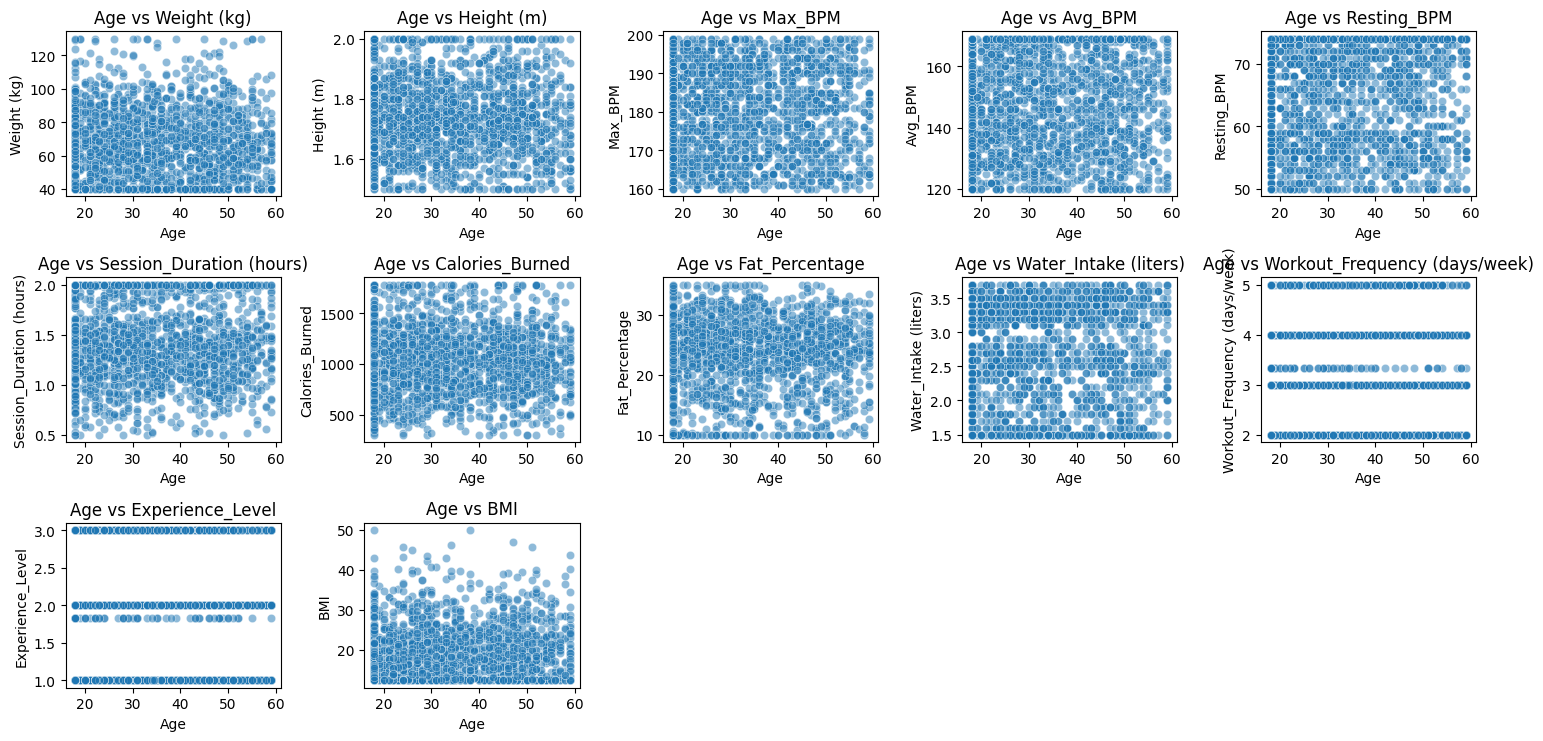

In [ ]:

plt.figure(figsize=(15, 12))

numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(15, 12))
for i, col in enumerate(numerical_columns[1:], 1):  # Exclude 'User_ID'
    plt.subplot(5, 5, i)
    sns.scatterplot(x=data[numerical_columns[0]], y=data[col], alpha=0.5)
    plt.title(f"{numerical_columns[0]} vs {col}")
    plt.xlabel(numerical_columns[0])
    plt.ylabel(col)

plt.tight_layout()
plt.show()

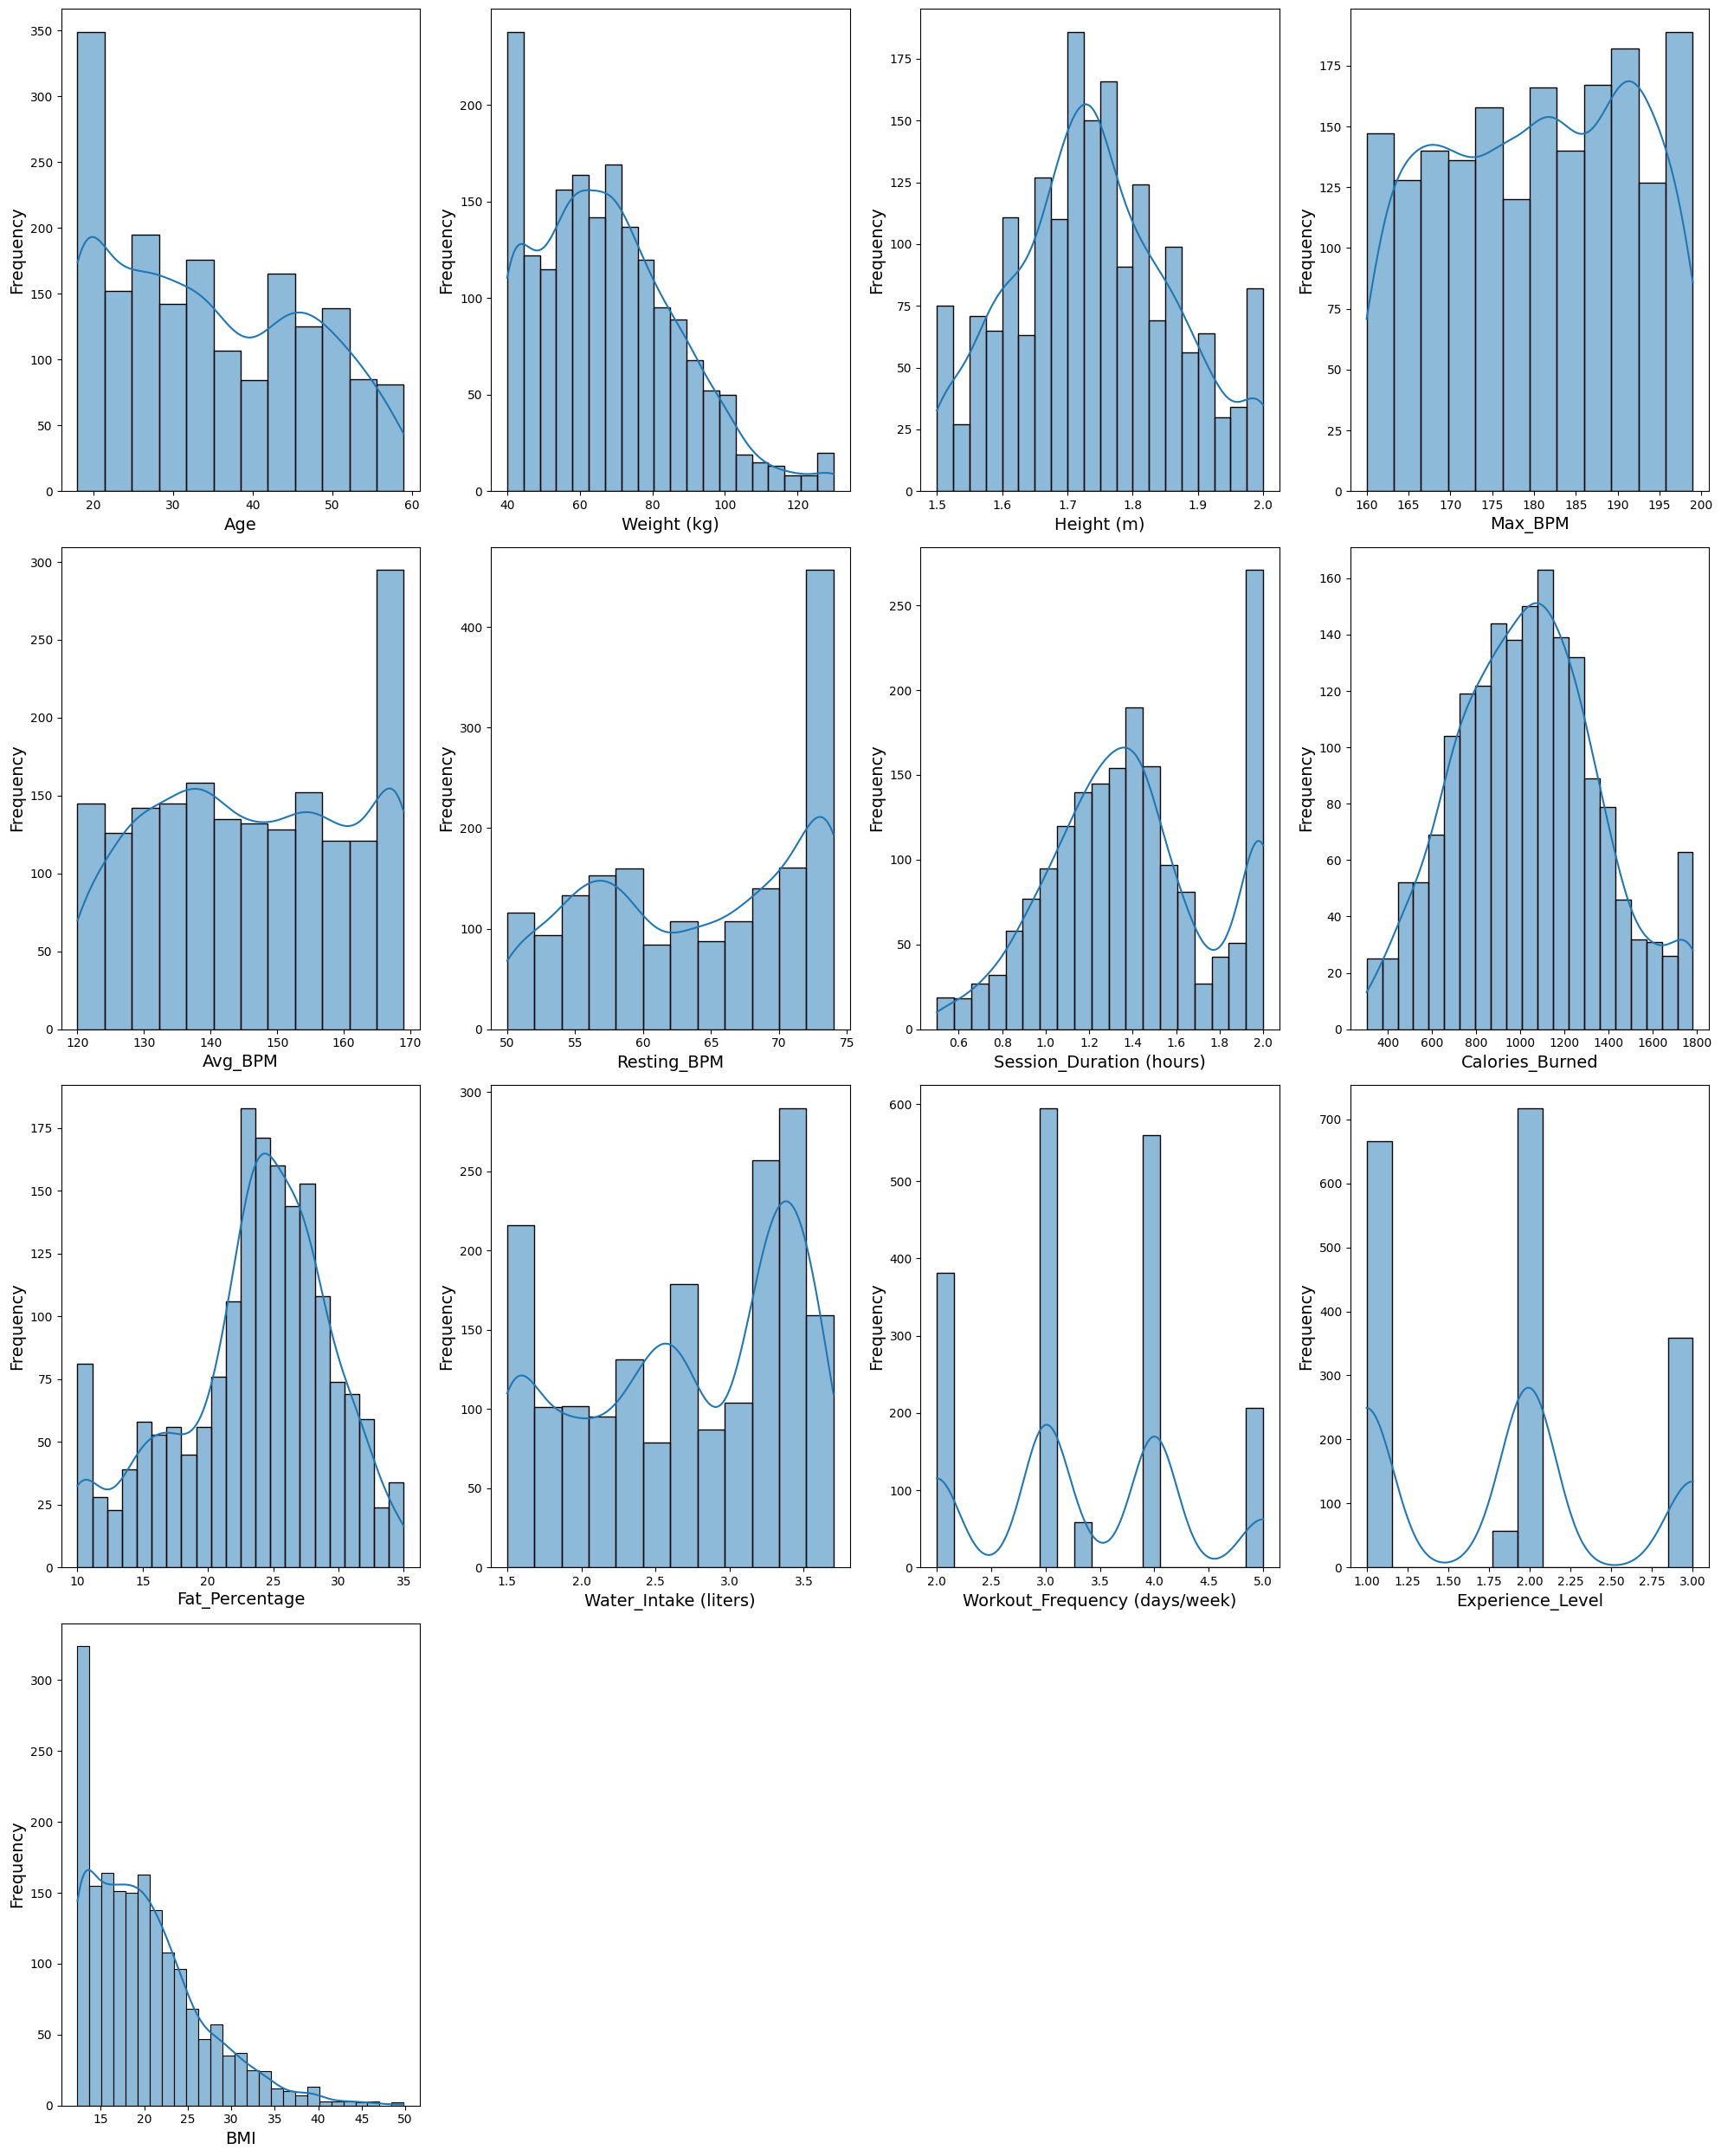

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

rows = 4
cols = 4
total_plots = rows * cols

plt.figure(figsize=(20, 25))

for i, column in enumerate(numeric_columns[:total_plots], 1):
    ax = plt.subplot(rows, cols, i)
    sns.histplot(data[column], kde=True, ax=ax)
    plt.xlabel(column, fontsize=14)
    plt.ylabel('Frequency', fontsize=14)

plt.tight_layout()
plt.show()

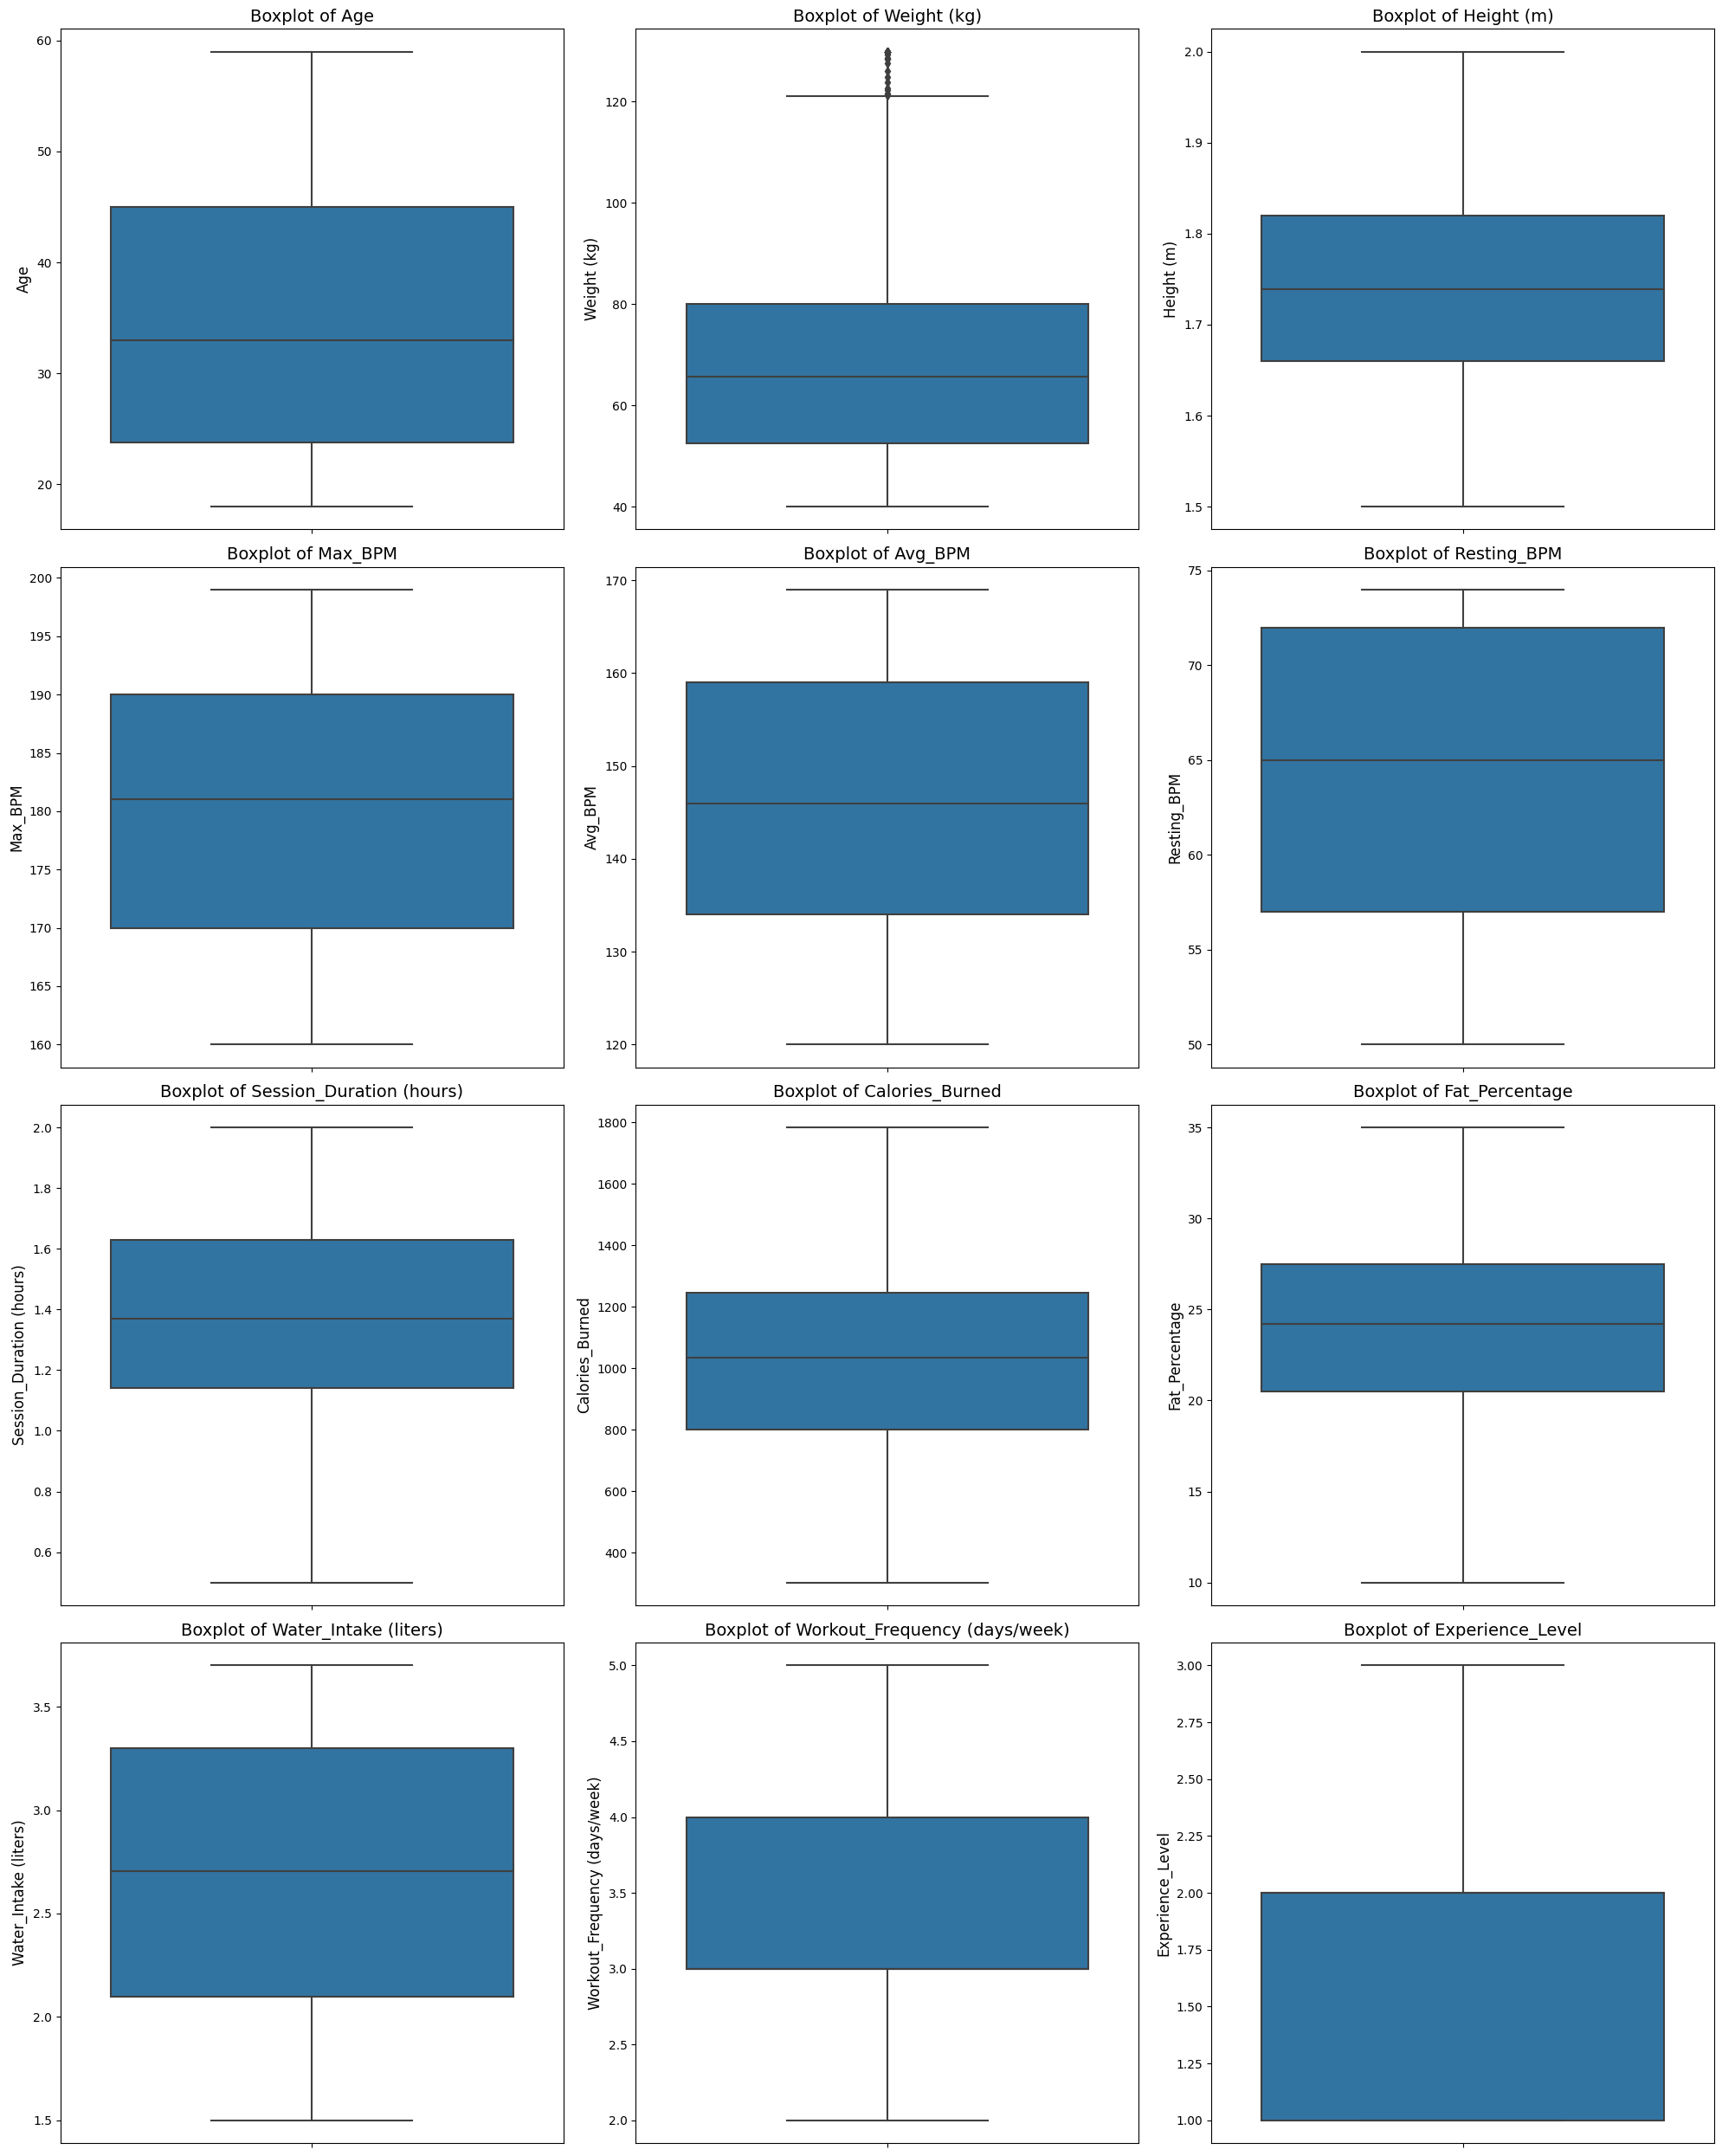

In [ ]:

rows = 4
cols = 3
total_plots = rows * cols

plt.figure(figsize=(20, 25))

for i, column in enumerate(numeric_columns[:total_plots], 1):
    ax = plt.subplot(rows, cols, i)
    sns.boxplot(y=data[column], ax=ax)
    plt.title(f"Boxplot of {column}", fontsize=14)
    plt.ylabel(column, fontsize=12)

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

label_encoders = {}
for col in data.select_dtypes(include=['category']).columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le


In [ ]:
print(data.head())

    Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0  34.0       0         86.7        1.86    174.0    152.0         74.0   
1  26.0       0         84.7        1.83    166.0    156.0         73.0   
2  22.0       1         64.8        1.85    187.0    166.0         64.0   
3  54.0       0         75.3        1.82    187.0    169.0         58.0   
4  34.0       0         52.8        1.74    177.0    169.0         66.0   

   Session_Duration (hours)  Calories_Burned  Workout_Type  Fat_Percentage  \
0                      1.12            712.0             2            12.8   
1                      1.00            833.0             2            27.9   
2                      1.24           1678.0             0            28.7   
3                      1.45            628.0             0            31.8   
4                      1.60           1286.0             2            26.4   

   Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
0  

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
target_column = 'Workout_Type'
X = data.drop(columns=[target_column])
y = data[target_column]
X, y = make_classification(n_samples=1000, n_features=20,n_informative=4, n_classes=4, random_state=42)

In [ ]:
print(y)

[3 3 2 1 2 1 1 3 0 2 2 1 3 0 0 1 3 2 0 2 3 1 1 3 0 2 3 0 1 2 0 2 1 2 2 2 0
 0 0 2 0 1 2 3 3 1 3 2 2 3 3 2 1 0 0 1 0 2 0 1 2 2 1 0 1 2 2 3 3 3 1 3 0 2
 0 3 2 3 0 1 1 0 0 2 1 2 3 1 1 3 2 0 3 0 2 1 2 3 3 2 3 0 2 2 0 1 1 3 2 3 0
 2 0 3 3 1 1 3 3 3 0 3 1 3 0 1 0 2 0 3 1 2 2 1 2 1 2 0 2 2 3 0 1 1 1 2 2 1
 3 2 0 2 2 2 2 2 3 2 2 2 1 0 3 2 1 2 0 2 1 2 2 3 3 3 2 3 1 2 1 2 3 2 2 2 3
 2 1 0 2 3 1 2 2 0 1 2 1 3 0 1 1 1 2 0 3 3 1 0 1 2 0 0 2 2 0 1 2 1 3 2 1 2
 1 1 2 3 3 3 3 0 2 3 0 3 2 1 3 0 3 1 3 1 2 1 1 2 3 2 1 2 1 3 3 1 1 3 3 1 2
 0 3 2 1 1 1 2 3 1 1 1 2 0 0 1 1 1 3 2 0 1 3 3 3 3 3 3 3 3 0 2 3 2 2 1 1 1
 2 0 0 0 1 2 3 0 0 1 2 1 3 0 2 0 0 2 3 2 2 0 2 2 2 3 1 2 0 0 1 3 3 3 1 1 1
 1 3 0 3 1 2 0 2 3 0 2 3 0 1 0 2 3 3 1 2 3 3 1 2 2 3 1 0 3 2 1 2 0 3 0 0 0
 1 0 1 1 0 3 1 2 3 2 1 2 1 0 3 3 2 3 3 1 1 0 3 1 3 3 2 0 1 0 0 1 3 1 1 3 0
 3 0 2 1 1 0 2 0 1 0 2 2 3 2 3 1 0 3 2 1 2 3 2 1 2 3 2 1 3 2 1 0 0 1 3 2 0
 3 3 0 1 1 1 3 3 0 1 2 1 0 0 2 0 0 1 2 2 3 1 3 0 0 3 1 2 3 0 2 3 2 2 2 1 3
 3 0 0 3 1 1 3 0 2 2 2 2 

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
dt_classifier = DecisionTreeClassifier(random_state=42)

dt_classifier.fit(X_train, y_train)

y_train_pred = dt_classifier.predict(X_train)
y_test_pred = dt_classifier.predict(X_test)

dt_test_accuracy = accuracy_score(y_test, y_test_pred)

train_report = classification_report(y_train, y_train_pred)
test_report = classification_report(y_test, y_test_pred)
print("Test Accuracy:", dt_test_accuracy)
print("\nClassification Report (Test Data):\n", test_report)

Test Accuracy: 0.66

Classification Report (Test Data):
               precision    recall  f1-score   support

           0       0.62      0.74      0.68        47
           1       0.62      0.46      0.53        50
           2       0.67      0.72      0.70        54
           3       0.71      0.71      0.71        49

    accuracy                           0.66       200
   macro avg       0.66      0.66      0.65       200
weighted avg       0.66      0.66      0.65       200



In [ ]:
# Initialize SVM classifier with RBF kernel
svm_clf = SVC(kernel='rbf', gamma='scale', random_state=42)

svm_clf.fit(X_train, y_train)

y_train_pred = svm_clf.predict(X_train)
y_test_pred = svm_clf.predict(X_test)

svm_train_accuracy = accuracy_score(y_train, y_train_pred)
svm_test_accuracy = accuracy_score(y_test, y_test_pred)


train_report = classification_report(y_train, y_train_pred)
test_report = classification_report(y_test, y_test_pred)

print("Test Accuracy:", svm_test_accuracy)
print("\nClassification Report (Test Data):\n", test_report)

Test Accuracy: 0.6

Classification Report (Test Data):
               precision    recall  f1-score   support

           0       0.49      0.70      0.58        47
           1       0.55      0.58      0.56        50
           2       0.75      0.56      0.64        54
           3       0.70      0.57      0.63        49

    accuracy                           0.60       200
   macro avg       0.62      0.60      0.60       200
weighted avg       0.63      0.60      0.60       200



In [ ]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

y_train_pred = svm_clf.predict(X_train)
y_test_pred = svm_clf.predict(X_test)

rf_train_accuracy = accuracy_score(y_train, y_train_pred)
rf_test_accuracy = accuracy_score(y_test, y_test_pred)

train_report = classification_report(y_train, y_train_pred)
test_report = classification_report(y_test, y_test_pred)


print("Test Accuracy:", rf_test_accuracy)
print("\nClassification Report (Test Data):\n", test_report)

Test Accuracy: 0.6

Classification Report (Test Data):
               precision    recall  f1-score   support

           0       0.49      0.70      0.58        47
           1       0.55      0.58      0.56        50
           2       0.75      0.56      0.64        54
           3       0.70      0.57      0.63        49

    accuracy                           0.60       200
   macro avg       0.62      0.60      0.60       200
weighted avg       0.63      0.60      0.60       200



In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Initialize XGBoost classifier
xgb_clf = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', random_state=42)

# Train the model
xgb_clf.fit(X_train, y_train)

# Make predictions
y_train_pred = xgb_clf.predict(X_train)
y_test_pred = xgb_clf.predict(X_test)

# Evaluate accuracy
xgb_train_accuracy = accuracy_score(y_train, y_train_pred)
xgb_test_accuracy = accuracy_score(y_test, y_test_pred)

train_report = classification_report(y_train, y_train_pred)
test_report = classification_report(y_test, y_test_pred)


print("Test Accuracy:", xgb_test_accuracy)
print("\nClassification Report (Test Data):\n", test_report)

Test Accuracy: 0.725

Classification Report (Test Data):
               precision    recall  f1-score   support

           0       0.63      0.72      0.67        47
           1       0.69      0.68      0.69        50
           2       0.78      0.72      0.75        54
           3       0.81      0.78      0.79        49

    accuracy                           0.72       200
   macro avg       0.73      0.73      0.73       200
weighted avg       0.73      0.72      0.73       200



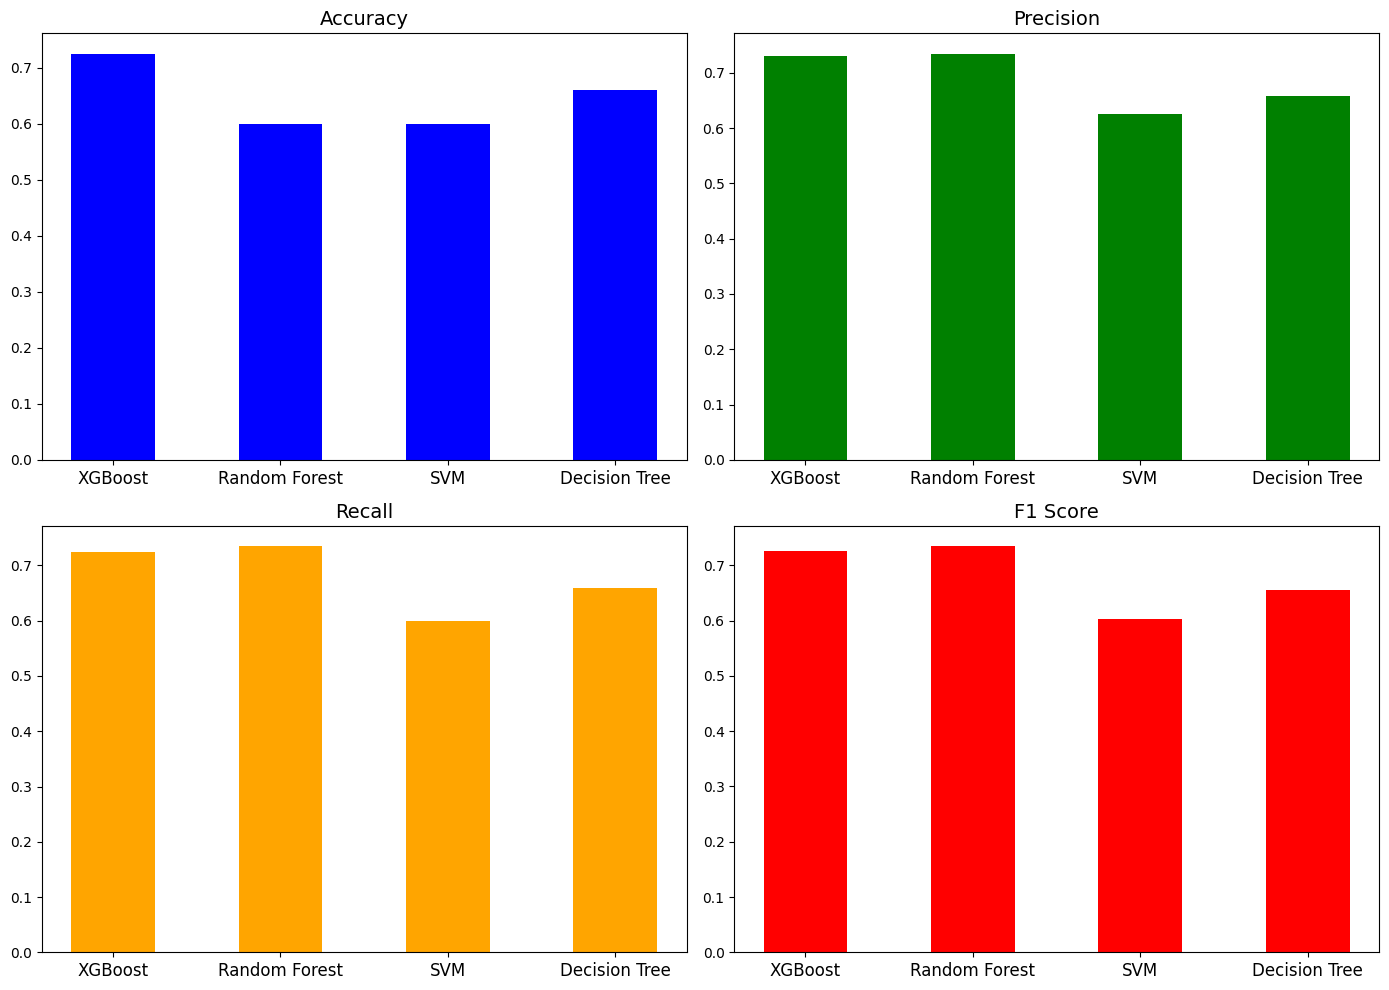

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

models = ["XGBoost", "Random Forest", "SVM", "Decision Tree"]
accuracies = [xgb_test_accuracy, rf_test_accuracy, svm_test_accuracy, dt_test_accuracy]
precisions = [
    precision_score(y_test, xgb_clf.predict(X_test), average='weighted'),
    precision_score(y_test, rf_clf.predict(X_test), average='weighted'),
    precision_score(y_test, svm_clf.predict(X_test), average='weighted'),
    precision_score(y_test, dt_classifier.predict(X_test), average='weighted')
]
recalls = [
    recall_score(y_test, xgb_clf.predict(X_test), average='weighted'),
    recall_score(y_test, rf_clf.predict(X_test), average='weighted'),
    recall_score(y_test, svm_clf.predict(X_test), average='weighted'),
    recall_score(y_test, dt_classifier.predict(X_test), average='weighted')
]
f1_scores = [
    f1_score(y_test, xgb_clf.predict(X_test), average='weighted'),
    f1_score(y_test, rf_clf.predict(X_test), average='weighted'),
    f1_score(y_test, svm_clf.predict(X_test), average='weighted'),
    f1_score(y_test, dt_classifier.predict(X_test), average='weighted')
]

x = np.arange(len(models))
width = 0.5

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Accuracy Plot
axes[0, 0].bar(x, accuracies, width, color='blue')
axes[0, 0].set_title('Accuracy', fontsize=14)
axes[0, 0].set_xticks(x)
axes[0, 0].set_xticklabels(models, fontsize=12)

# Precision Plot
axes[0, 1].bar(x, precisions, width, color='green')
axes[0, 1].set_title('Precision', fontsize=14)
axes[0, 1].set_xticks(x)
axes[0, 1].set_xticklabels(models, fontsize=12)

# Recall Plot
axes[1, 0].bar(x, recalls, width, color='orange')
axes[1, 0].set_title('Recall', fontsize=14)
axes[1, 0].set_xticks(x)
axes[1, 0].set_xticklabels(models, fontsize=12)

# F1-Score Plot
axes[1, 1].bar(x, f1_scores, width, color='red')
axes[1, 1].set_title('F1 Score', fontsize=14)
axes[1, 1].set_xticks(x)
axes[1, 1].set_xticklabels(models, fontsize=12)

plt.tight_layout()
plt.show()
